In [441]:
import pandas as pd
import os
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
os.chdir("C:/Users/lenovo/Desktop/jupyternotebook")
data = pd.ExcelFile("HW_Data_Set.xlsx")

In [442]:
from pandas import read_excel
# find your sheet name at the bottom left of your excel file and assign 
# it to my_sheet 
my_sheet = 'Sheet1' # change it to your sheet name
file_name = 'HW_Data_Set.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)

In [443]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [445]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [447]:
#sütundaki toplam NaN değerleri verir.Hangi sütunda kaç tane nan değer olduğunu gösterir.
df.isnull().sum().sort_values(ascending=False)

90_target    0
ind_51       0
ind_62       0
ind_61       0
ind_58       0
            ..
ind_311      0
ind_313      0
ind_315      0
ind_316      0
ind_5        0
Length: 136, dtype: int64

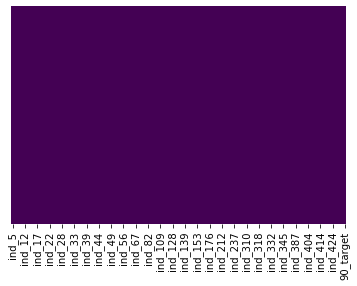

In [448]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [449]:
datanum=df.select_dtypes(include=['float64','int32','int64'])
datanum

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,0.004633,14.7,-28.2,-40,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,0.008511,14.3,-28.6,-41,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,0.008848,5.7,-37.2,-49,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,0.008940,1.4,-48.9,-61,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [450]:
datacat=df.select_dtypes(include=['object'])
datacat

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388
...,...,...,...
6162,RED,-11,-270
6163,RED,-12,-271
6164,GREEN,-21,-280
6165,GREEN,-33,-292


In [451]:
Encod_data = pd.get_dummies(df['ind_109'])
df['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [452]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['ind_109'] = lb.fit_transform(df['ind_109'])
print(df['ind_109'])

0       0
1       0
2       0
3       0
4       0
       ..
6162    1
6163    1
6164    0
6165    0
6166    0
Name: ind_109, Length: 6167, dtype: int32


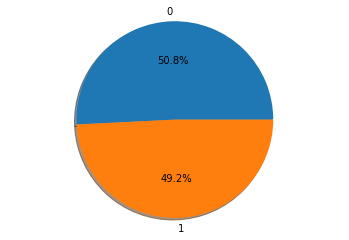

In [453]:
labels = df['ind_109'].astype('category').cat.categories.tolist()
counts = df['ind_109'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [454]:
print(df['ind_420'].value_counts())

?       1041
28        37
45        35
29        33
39        33
        ... 
-303       1
270        1
-308       1
-310       1
-346       1
Name: ind_420, Length: 582, dtype: int64


In [455]:
print(df['ind_420'].value_counts().count())

582


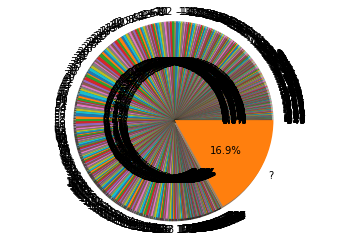

In [456]:
labels = df['ind_420'].astype('category').cat.categories.tolist()
counts = df['ind_420'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [457]:
print(df['ind_422'].value_counts())

?       1041
-211      33
-125      31
-200      30
-212      28
        ... 
-500       1
-496       1
-484       1
-482       1
-509       1
Name: ind_422, Length: 573, dtype: int64


In [458]:
print(df['ind_422'].value_counts().count())

573


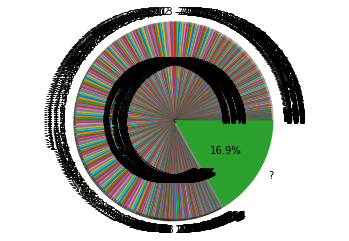

In [459]:
labels = df['ind_422'].astype('category').cat.categories.tolist()
counts = df['ind_422'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [460]:
df.isnull().values.any()

False

In [461]:
df = df.replace('?',np.NaN)

In [462]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [463]:
df.isnull().values.any()

True

In [464]:
df['ind_420'].dropna()

0      -152.0
1      -158.0
2      -160.0
3      -166.0
4      -186.0
        ...  
6162    -11.0
6163    -12.0
6164    -21.0
6165    -33.0
6166    -28.0
Name: ind_420, Length: 5126, dtype: float64

In [465]:
df['ind_422'].dropna()

0      -353.0
1      -359.0
2      -362.0
3      -367.0
4      -388.0
        ...  
6162   -270.0
6163   -271.0
6164   -280.0
6165   -292.0
6166   -288.0
Name: ind_422, Length: 5126, dtype: float64

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(90), int64(46)
memory usage: 6.4 MB


In [469]:
dfcor=df.copy()
del dfcor['90_target']
del dfcor['50_target']
del dfcor['20_target']
del dfcor['ind_109']
del dfcor['ind_420']
del dfcor['ind_422']
dfcor.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,-0.926784,-0.110064,-0.393843,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,-0.880981,-0.034463,-0.280376,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,-0.569198,-0.181129,-0.370345,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,0.581610,0.222974,0.426831,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,-0.694008,-0.243727,-0.480781,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_416,-0.304134,-0.279922,-0.277258,0.349318,-0.377913,-0.387471,-0.325331,0.037185,0.036179,0.023764,...,0.351134,0.172970,0.272643,-0.144024,0.270985,1.000000,0.352255,-0.136217,-0.356302,-0.260048
ind_418,-0.620099,-0.569657,-0.432579,0.505772,-0.565931,-0.724635,-0.577594,-0.201515,-0.279639,-0.362005,...,0.737015,0.449924,0.608940,-0.337149,0.348695,0.352255,1.000000,-0.293695,-0.594243,-0.487564
ind_424,0.076169,0.021220,0.144795,-0.173139,0.191752,0.385101,0.354028,-0.011056,-0.010548,-0.013790,...,-0.290321,-0.623174,-0.515309,0.027318,-0.269870,-0.136217,-0.293695,1.000000,0.341017,0.188853
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,-0.720418,-0.362339,-0.642797,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754


In [470]:
y2 = df["90_target"]
X2= dfcor

In [471]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (4625, 130)
y_train (4625,)
X_test (1542, 130)
y_test (1542,)
training (6167, 136)


In [472]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modelx=lm.fit()
modelx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.191
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              8.150
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   1.67e-127
Time:                        17:30:43   Log-Likelihood:                         -22775.
No. Observations:                4625   AIC:                                  4.581e+04
Df Residuals:                    4495   BIC:                                  4.665e+04
Df Model:                         130                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          1.1197      0.924      1.211      0.226      -0.693       2.932
ind_6          0.7086      0.754      0.940      0.347      -0.770       2.187
ind_8      -4.392e+08   1.44e+08     -3.059      0.002   -7.21e+08   -1.58e+08
ind_9       4.392e+08   1.44e+08      3.059      0.002    1.58e+08    7.21e+08
ind_10      4.392e+08   1.44e+08      3.059      0.002    1.58e+08    7.21e+08
ind_12         6.3223      2.168      2.916      0.004       2.072      10.573
ind_13         0.0118      0.026      0.452      0.651      -0.039       0.063
ind_14         0.1084      0.188      0.577      0.564      -0.260       0.477
ind_15        -0.3406      0.268     -1.271      0.204      -0.866       0.185
ind_16        -0.0476      0.398     -0.120      0.905      -0.827       0.732
ind_17         0.8459      0.418      2.022      0.043       0.026       1.666
ind_18         1.8386      0.301      6.113      0.000       1.249       2.428
ind_19         1.5086      1.422      1.061      0.289      -1.279       4.296
ind_20        -1.4143      1.146     -1.234      0.217      -3.662       0.833
ind_21         1.4040      1.354      1.037      0.300      -1.250       4.059
ind_22        -0.3278      0.349     -0.938      0.348      -1.013       0.357
ind_23        -0.3069      0.352     -0.872      0.383      -0.997       0.383
ind_25      -2.98e+05   1.09e+06     -0.274      0.784   -2.43e+06    1.84e+06
ind_26     -2.978e+05   1.09e+06     -0.274      0.784   -2.43e+06    1.84e+06
ind_27      5.917e+05   2.18e+06      0.272      0.786   -3.67e+06    4.86e+06
ind_28        -0.0038      0.013     -0.305      0.761      -0.028       0.021
ind_29        -0.0224      0.019     -1.151      0.250      -0.061       0.016
ind_30        -0.0267      0.022     -1.196      0.232      -0.071       0.017
ind_31         0.0662      0.031      2.151      0.031       0.006       0.126
ind_32        -0.0758      0.029     -2.614      0.009      -0.133      -0.019
ind_33         0.0540      0.027      2.003      0.045       0.001       0.107
ind_34        -0.0135      0.030     -0.448      0.654      -0.073       0.046
ind_35        -0.0459      0.025     -1.836      0.066      -0.095       0.003
ind_36         0.0013      0.019      0.067      0.946      -0.035       0.038
ind_37         0.0759      0.019      4.092      0.000       0.040       0.112
ind_39        -0.1943      0.087     -2.235      0.025      -0.365      -0.024
ind_40        -0.7182      1.369     -0.525      0.600      -3.402       1.966
ind_41         0.1108      0.081      1.366      0.172      -0.048       0.270
ind_42         0.6984      0.416      1.680      0.093      -0.117       1.514
ind_43         0.6679      0.269      2.483      0.013       

In [473]:
pva=model1.pvalues
removing=pva[pva>0.05]
removing

ind_5      0.225866
ind_6      0.347462
ind_13     0.651356
ind_14     0.563761
ind_15     0.203744
             ...   
ind_410    0.333184
ind_414    0.138217
ind_418    0.170144
ind_424    0.720293
ind_426    0.555484
Length: 82, dtype: float64

In [474]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4625, 48)

In [475]:
X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1542, 48)

In [476]:

import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modelx=lm.fit()
modelx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.152
Method:                 Least Squares   F-statistic:                              18.30
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   1.49e-138
Time:                        17:30:48   Log-Likelihood:                         -22858.
No. Observations:                4625   AIC:                                  4.581e+04
Df Residuals:                    4577   BIC:                                  4.612e+04
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8      -4.062e+08   1.38e+08     -2.951      0.003   -6.76e+08   -1.36e+08
ind_9       4.062e+08   1.38e+08      2.951      0.003    1.36e+08    6.76e+08
ind_10      4.062e+08   1.38e+08      2.951      0.003    1.36e+08    6.76e+08
ind_12         3.6812      0.505      7.286      0.000       2.691       4.672
ind_17         0.4562      0.139      3.288      0.001       0.184       0.728
ind_18         2.0035      0.263      7.624      0.000       1.488       2.519
ind_31         0.0583      0.022      2.709      0.007       0.016       0.101
ind_32        -0.0656      0.025     -2.620      0.009      -0.115      -0.017
ind_33         0.0075      0.017      0.453      0.651      -0.025       0.040
ind_37         0.0832      0.014      6.102      0.000       0.056       0.110
ind_39        -0.1887      0.062     -3.040      0.002      -0.310      -0.067
ind_43        -0.0962      0.139     -0.692      0.489      -0.369       0.176
ind_47         0.5375      0.089      6.040      0.000       0.363       0.712
ind_50         1.1067      0.115      9.586      0.000       0.880       1.333
ind_51        -0.4740      0.087     -5.452      0.000      -0.644      -0.304
ind_70         3.8639      1.393      2.774      0.006       1.133       6.595
ind_74        -0.2885      0.129     -2.230      0.026      -0.542      -0.035
ind_77         0.5485      0.132      4.154      0.000       0.290       0.807
ind_82         7.3133      1.566      4.670      0.000       4.243      10.384
ind_130       -1.3015      0.110    -11.884      0.000      -1.516      -1.087
ind_132        0.1098      0.051      2.139      0.033       0.009       0.210
ind_142        0.3849      0.262      1.467      0.143      -0.130       0.899
ind_145        8.3528      6.678      1.251      0.211      -4.739      21.444
ind_147       -0.6492      0.177     -3.659      0.000      -0.997      -0.301
ind_153       -9.0243      0.676    -13.352      0.000     -10.349      -7.699
ind_156        4.2633      0.511      8.343      0.000       3.262       5.265
ind_188        0.0244      0.044      0.550      0.582      -0.063       0.111
ind_194        0.3390      0.137      2.473      0.013       0.070       0.608
ind_212        0.0680      0.045      1.513      0.130      -0.020       0.156
ind_217        1.6511      0.605      2.727      0.006       0.464       2.838
ind_225     2.195e+04   5192.792      4.227      0.000    1.18e+04    3.21e+04
ind_228       -9.6909      3.780     -2.564      0.010     -17.101      -2.281
ind_234    -5.407e+06   1.27e+06     -4.259      0.000    -7.9e+06   -2.92e+06
ind_237        0.0760      0.019      3.987      0.000       0.039       0.113
ind_241        2.6150      0.965      2.709      0.007       

In [477]:
target=df['90_target'] 
features= X_test
corrx = pd.concat([target, features], axis=1, keys=['target', 'features']).corr().loc['features', 'target']
cx = corrx.abs().unstack()
cx.sort_values(ascending = False)

90_target  ind_18     0.141535
           ind_17     0.135922
           ind_324    0.107905
           ind_412    0.098240
           ind_77     0.063192
           ind_332    0.061300
           ind_321    0.056416
           ind_74     0.056209
           ind_37     0.053429
           ind_212    0.043765
           ind_8      0.040498
           ind_10     0.038820
           ind_310    0.036543
           ind_142    0.036117
           ind_188    0.031809
           ind_228    0.030535
           ind_130    0.027175
           ind_243    0.025155
           ind_33     0.025113
           ind_9      0.023799
           ind_241    0.021888
           ind_70     0.021639
           ind_217    0.018494
           ind_12     0.016709
           ind_225    0.016452
           ind_428    0.016265
           ind_234    0.016134
           ind_147    0.015918
           ind_387    0.013770
           ind_82     0.013618
           ind_132    0.013160
           ind_50     0.012685
        

In [478]:
##target ve diğer değişkenler arasında korelansyonu en yüksek olanlar
cx.sort_values(ascending=True, inplace=True)
columns_above_x = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.01 and col1 != col2]

In [479]:
columns_above_x

[('90_target', 'ind_8'),
 ('90_target', 'ind_9'),
 ('90_target', 'ind_10'),
 ('90_target', 'ind_12'),
 ('90_target', 'ind_17'),
 ('90_target', 'ind_18'),
 ('90_target', 'ind_31'),
 ('90_target', 'ind_33'),
 ('90_target', 'ind_37'),
 ('90_target', 'ind_39'),
 ('90_target', 'ind_50'),
 ('90_target', 'ind_70'),
 ('90_target', 'ind_74'),
 ('90_target', 'ind_77'),
 ('90_target', 'ind_82'),
 ('90_target', 'ind_130'),
 ('90_target', 'ind_132'),
 ('90_target', 'ind_142'),
 ('90_target', 'ind_147'),
 ('90_target', 'ind_188'),
 ('90_target', 'ind_194'),
 ('90_target', 'ind_212'),
 ('90_target', 'ind_217'),
 ('90_target', 'ind_225'),
 ('90_target', 'ind_228'),
 ('90_target', 'ind_234'),
 ('90_target', 'ind_237'),
 ('90_target', 'ind_241'),
 ('90_target', 'ind_243'),
 ('90_target', 'ind_310'),
 ('90_target', 'ind_321'),
 ('90_target', 'ind_324'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_387'),
 ('90_target', 'ind_412'),
 ('90_target', 'ind_428')]

In [480]:
yy=df["90_target"]
Xx=df[["ind_8","ind_9","ind_10", "ind_12", "ind_18","ind_31","ind_33","ind_37","ind_39","ind_50", "ind_70", "ind_74","ind_77",
   "ind_82","ind_130", "ind_132", "ind_142", "ind_147","ind_188", "ind_194", "ind_212", "ind_217", "ind_225", "ind_228",
   "ind_234", "ind_237", "ind_241", "ind_243", "ind_310", "ind_321", "ind_324", "ind_332", "ind_387", "ind_412", "ind_428" ]]

In [481]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (4625, 35)
y_train (4625,)
X_test (1542, 35)
y_test (1542,)
training (6167, 136)


In [482]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modell=lm.fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):              0.108
Method:                 Least Squares   F-statistic:                              17.03
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    2.44e-96
Time:                        17:30:52   Log-Likelihood:                         -22982.
No. Observations:                4625   AIC:                                  4.603e+04
Df Residuals:                    4590   BIC:                                  4.626e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8      -3.939e+08   1.41e+08     -2.795      0.005    -6.7e+08   -1.18e+08
ind_9       3.939e+08   1.41e+08      2.795      0.005    1.18e+08     6.7e+08
ind_10      3.939e+08   1.41e+08      2.795      0.005    1.18e+08     6.7e+08
ind_12         0.0339      0.375      0.091      0.928      -0.701       0.769
ind_18         1.8122      0.232      7.802      0.000       1.357       2.268
ind_31         0.0023      0.015      0.153      0.878      -0.027       0.032
ind_33         0.0164      0.012      1.348      0.178      -0.007       0.040
ind_37         0.0470      0.013      3.573      0.000       0.021       0.073
ind_39        -0.0551      0.045     -1.229      0.219      -0.143       0.033
ind_50         0.9652      0.100      9.612      0.000       0.768       1.162
ind_70         3.0267      1.116      2.712      0.007       0.839       5.215
ind_74        -0.3273      0.132     -2.480      0.013      -0.586      -0.069
ind_77         0.6861      0.134      5.105      0.000       0.423       0.950
ind_82         2.4705      1.407      1.756      0.079      -0.287       5.228
ind_130       -0.9645      0.105     -9.224      0.000      -1.169      -0.760
ind_132        0.0918      0.028      3.292      0.001       0.037       0.146
ind_142        0.0240      0.236      0.102      0.919      -0.438       0.486
ind_147       -0.0594      0.170     -0.348      0.727      -0.393       0.275
ind_188        0.0112      0.041      0.271      0.786      -0.070       0.092
ind_194       -0.1807      0.099     -1.819      0.069      -0.375       0.014
ind_212        0.0487      0.041      1.195      0.232      -0.031       0.129
ind_217        1.6270      0.615      2.644      0.008       0.420       2.834
ind_225     1.255e+04   4783.583      2.624      0.009    3173.201    2.19e+04
ind_228      -18.3724      3.762     -4.884      0.000     -25.748     -10.997
ind_234    -3.099e+06   1.17e+06     -2.650      0.008   -5.39e+06   -8.06e+05
ind_237        0.0789      0.019      4.084      0.000       0.041       0.117
ind_241        0.7324      0.373      1.964      0.050       0.001       1.463
ind_243      -55.4735     30.413     -1.824      0.068    -115.097       4.150
ind_310        3.7583      1.382      2.720      0.007       1.049       6.468
ind_321       -0.0081      0.015     -0.537      0.591      -0.038       0.021
ind_324    -2.875e+04   4713.484     -6.099      0.000    -3.8e+04   -1.95e+04
ind_332        0.1795      0.020      9.205      0.000       0.141       0.218
ind_387        0.1497      0.090      1.668      0.095      -0.026       0.326
ind_412      934.8036    131.960      7.084      0.000     676.098    1193.509
ind_428      -13.1792      8.105     -1.626      0.104     -2

In [485]:
pva1=modell.pvalues
removing=pva1[pva1>0.05]
removing

ind_12     0.927866
ind_31     0.878125
ind_33     0.177741
ind_39     0.219030
ind_82     0.079095
ind_142    0.918859
ind_147    0.727496
ind_188    0.786454
ind_194    0.068965
ind_212    0.232090
ind_243    0.068215
ind_321    0.591131
ind_387    0.095411
ind_428    0.104008
dtype: float64

In [487]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4625, 21)

In [488]:
X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1542, 21)

In [489]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
modell=lm.fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.107
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              26.39
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                    1.20e-97
Time:                        17:33:04   Log-Likelihood:                         -23001.
No. Observations:                4625   AIC:                                  4.604e+04
Df Residuals:                    4604   BIC:                                  4.618e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8      -3.897e+08   1.41e+08     -2.764      0.006   -6.66e+08   -1.13e+08
ind_9       3.897e+08   1.41e+08      2.764      0.006    1.13e+08    6.66e+08
ind_10      3.897e+08   1.41e+08      2.764      0.006    1.13e+08    6.66e+08
ind_18         1.3464      0.176      7.671      0.000       1.002       1.690
ind_37         0.0516      0.012      4.157      0.000       0.027       0.076
ind_50         0.9116      0.096      9.448      0.000       0.722       1.101
ind_70         4.2764      0.900      4.753      0.000       2.513       6.040
ind_74        -0.3136      0.130     -2.408      0.016      -0.569      -0.058
ind_77         0.6915      0.133      5.193      0.000       0.430       0.953
ind_130       -0.9387      0.101     -9.302      0.000      -1.137      -0.741
ind_132        0.1316      0.021      6.393      0.000       0.091       0.172
ind_217        1.6063      0.603      2.666      0.008       0.425       2.788
ind_225     1.692e+04   3619.210      4.674      0.000    9822.530     2.4e+04
ind_228      -26.7985      2.887     -9.284      0.000     -32.458     -21.139
ind_234    -4.159e+06   8.83e+05     -4.708      0.000   -5.89e+06   -2.43e+06
ind_237        0.0569      0.018      3.184      0.001       0.022       0.092
ind_241        0.0558      0.022      2.524      0.012       0.012       0.099
ind_310        6.1844      1.277      4.845      0.000       3.682       8.687
ind_324    -2.712e+04   4506.181     -6.019      0.000    -3.6e+04   -1.83e+04
ind_332        0.1444      0.018      7.831      0.000       0.108       0.181
ind_412      844.5543    127.187      6.640      0.000     595.206    1093.902
==============================================================================
Omnibus:                    24406.417   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.088
Skew:                           0.182   Prob(JB):                    5.70e-110
Kurtosis:                       1.426   Cond. No.                     7.46e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [490]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [491]:
#datalarımın aynı scalede düzlemde oluşu önemli pca için
x_reduced_train = pca.fit_transform(scale(X_train))
x_reduced_train[0:1,:]

array([[-4.11686198e+00,  6.14200258e-01, -1.53397101e+00,
         1.59370522e+00, -5.70940948e-03, -8.25551702e-01,
        -2.91872003e-01,  1.25986357e+00, -1.03574964e+00,
         1.77644387e-01, -9.22086518e-02, -4.16083909e-01,
        -6.63882258e-01, -6.69668139e-01, -7.40246026e-03,
         3.73887443e-01, -1.73449133e-01,  8.80014694e-02,
        -7.22727823e-02, -5.92364051e-03, -1.31595399e-12]])

In [492]:
#öneri ilk scale sonra pca mantıklı
#maksimum varyansı sağlayan compenent sayısını belirleme önemli

In [493]:
import numpy as np
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 37.87,  49.94,  57.73,  64.18,  70.02,  74.65,  79.02,  83.02,
        86.68,  89.95,  92.73,  94.93,  96.85,  98.33,  98.92,  99.41,
        99.7 ,  99.97, 100.  , 100.  , 100.  ])

In [494]:
#np.cunsum olan 19 tane compenent bulmuşuz 84e kadar(5 compenent) alıp gerisini kullanmazdı hoca
#mesela 2 compenent ile yüzde 59 açıklamışım

([<matplotlib.axis.XTick at 0x139b2611348>,
 <a list of 21 Text xticklabel objects>)

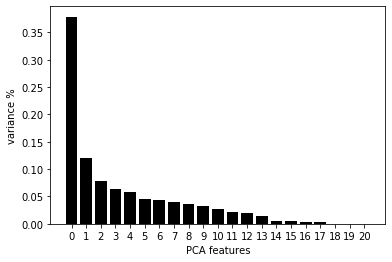

In [495]:
#kümülatifin grafie döklmüş hali
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
#datamda yüzde  95 açıklayıcılık istiyorum kaç compenet gerekiyor
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

In [506]:
print(pca_fon(Xx, 0.95))

pca sonrası değişken sayısı:  16
             0         1         2         3         4         5         6  \
0     5.768520  0.175678  2.425145 -1.959444  2.760614  0.205509  2.186850   
1     6.157922 -0.034167  2.441767 -1.977398  2.694675  0.199050  2.200953   
2     6.338913  0.098684  2.327711 -2.026420  2.581493  0.174138  2.244865   
3     6.598523 -0.144392  2.399875 -2.023000  2.574711  0.203734  2.213145   
4     7.383676 -0.401636  2.380878 -2.195868  2.672596  0.352550  2.206709   
...        ...       ...       ...       ...       ...       ...       ...   
6162  3.751432  1.594566 -1.415973 -1.395197 -1.546551  0.857658 -0.379876   
6163  3.787372  1.491143 -1.427532 -1.438853 -1.534768  0.976485 -0.161124   
6164  4.940321  0.068182 -0.788875 -1.428882 -0.786188  1.668395 -0.008382   
6165  6.410550 -1.281549 -0.531059 -1.194647 -0.928894  1.291579 -0.109870   
6166  5.756138 -0.375757 -0.918556 -1.259966 -1.403965  0.917537 -0.238867   

             7         8      

In [507]:
pca = PCA(n_components = 16)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [508]:
pcr_model.intercept_

-3.28485644545081

In [509]:
pcr_model.coef_

array([ 1.04489784,  1.61562236, -0.70466949,  3.09489746, -2.3793615 ,
       -2.72296084,  1.31052563, -1.07717599,  3.01454709,  3.9395016 ,
        3.10822011, -5.62701278, -3.94854697,  2.68086624,  1.42710157,
       10.88186988])

In [510]:
y_pred= pcr_model.predict(X_reduced_train)
y_pred[0:5]
#sadece result olarakdeğer döneceksek kullanılabilir

array([  4.45731401, -12.99368192, -11.47360247, -15.75824705,
        13.95510287])

In [511]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

35.41652694959362

In [512]:
df["90_target"].mean()

-3.315072358419006

In [513]:
r2_score(y_train, y_pred)

0.07695173831558466

Text(0, 0.5, 'PCA 2')

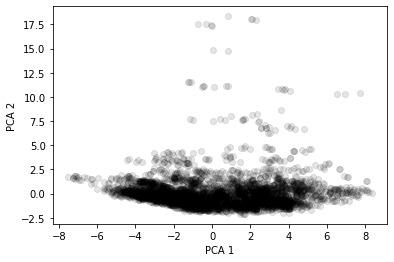

In [514]:
#datada belirli bir kümelenme varsa gör diye
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color ='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#sonucu hoca 2ye bölermiş